In [103]:
#!pip3 install ipywidgets widgetsnbextension
#!jupyter nbextension install --py widgetsnbextension --user
#!jupyter nbextension enable widgetsnbextension --user --py

In [105]:
#!pipenv install pyobjc-core pyobjc pillow pyscreeze PyTweening opencv_python pyautogui

In [106]:
#!pip3 install img2pdf 

In [129]:
!pip install pytesseract

     |████████████████████████████████| 174kB 1.2MB/s eta 0:00:01
  Stored in directory: /Users/iida/Library/Caches/pip/wheels/d5/90/56/ab7b652592da86821293f7cadc1c554aa376a0d57ce414d0a0
Successfully built pytesseract


In [193]:
from IPython.display import display
import pendulum
import pyautogui
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntRangeSlider
import time
import os
import img2pdf
import pytesseract
from glob import glob

%matplotlib inline

In [132]:
pytesseract.image_to_data

<function pytesseract.pytesseract.image_to_data(image, lang=None, config='', nice=0, output_type='string')>

In [5]:
#%config InlineBackend.figure_format = 'retina'

In [77]:
#plt.figure(figsize=(1,1),dpi=10)

In [27]:
def makeRangeSlider(max_n):
    # 範囲のスライダーを作る。2f%で計算しても良さそうだったけど、細かいところまで弄れるように画素単位にした。
    return IntRangeSlider(
    value=[0., max_n],
    min=0., max= max_n-1, step=1,
    description='xlim:',
    readout_format='.1d',
)

In [88]:
def cropImage(heightRange, widthRange):
    plt.figure(figsize=(20, 20))
    plt.imshow(capture_array[heightRange[0]:heightRange[1], widthRange[0]:widthRange[1]])

In [165]:
time.sleep(20)
screen_capture = pyautogui.screenshot()
capture_array = np.asarray(screen_capture)
height, width = capture_array.shape[0], capture_array.shape[1]

In [170]:
page_count = 200

In [190]:
time.sleep(30)
for i in range(page_count):
    name = './stock/test{}.png'.format(str(i).zfill(4))
    pyautogui.screenshot(name, region=(50,335, 1335-50, 2235-335))
    #time.sleep(0.01)
    pyautogui.press('right')
    #time.sleep(0.01)

In [126]:
!mkdir stock

mkdir: cannot create directory ‘stock’: File exists


In [189]:
#!rm stock/*

In [175]:
time.sleep(0.5)

In [191]:
ls stock

test0000.png  test0040.png  test0080.png  test0120.png	test0160.png
test0001.png  test0041.png  test0081.png  test0121.png	test0161.png
test0002.png  test0042.png  test0082.png  test0122.png	test0162.png
test0003.png  test0043.png  test0083.png  test0123.png	test0163.png
test0004.png  test0044.png  test0084.png  test0124.png	test0164.png
test0005.png  test0045.png  test0085.png  test0125.png	test0165.png
test0006.png  test0046.png  test0086.png  test0126.png	test0166.png
test0007.png  test0047.png  test0087.png  test0127.png	test0167.png
test0008.png  test0048.png  test0088.png  test0128.png	test0168.png
test0009.png  test0049.png  test0089.png  test0129.png	test0169.png
test0010.png  test0050.png  test0090.png  test0130.png	test0170.png
test0011.png  test0051.png  test0091.png  test0131.png	test0171.png
test0012.png  test0052.png  test0092.png  test0132.png	test0172.png
test0013.png  test0053.png  test0093.png  test0133.png	test0173.png
test0014.png  test0054.png  test0094.png  test01

In [ ]:
path =  os.getcwd()
filenames = os.listdir(path)

for filename in filenames:
    os.rename(filename, filename.replace(" ", "-").lower())

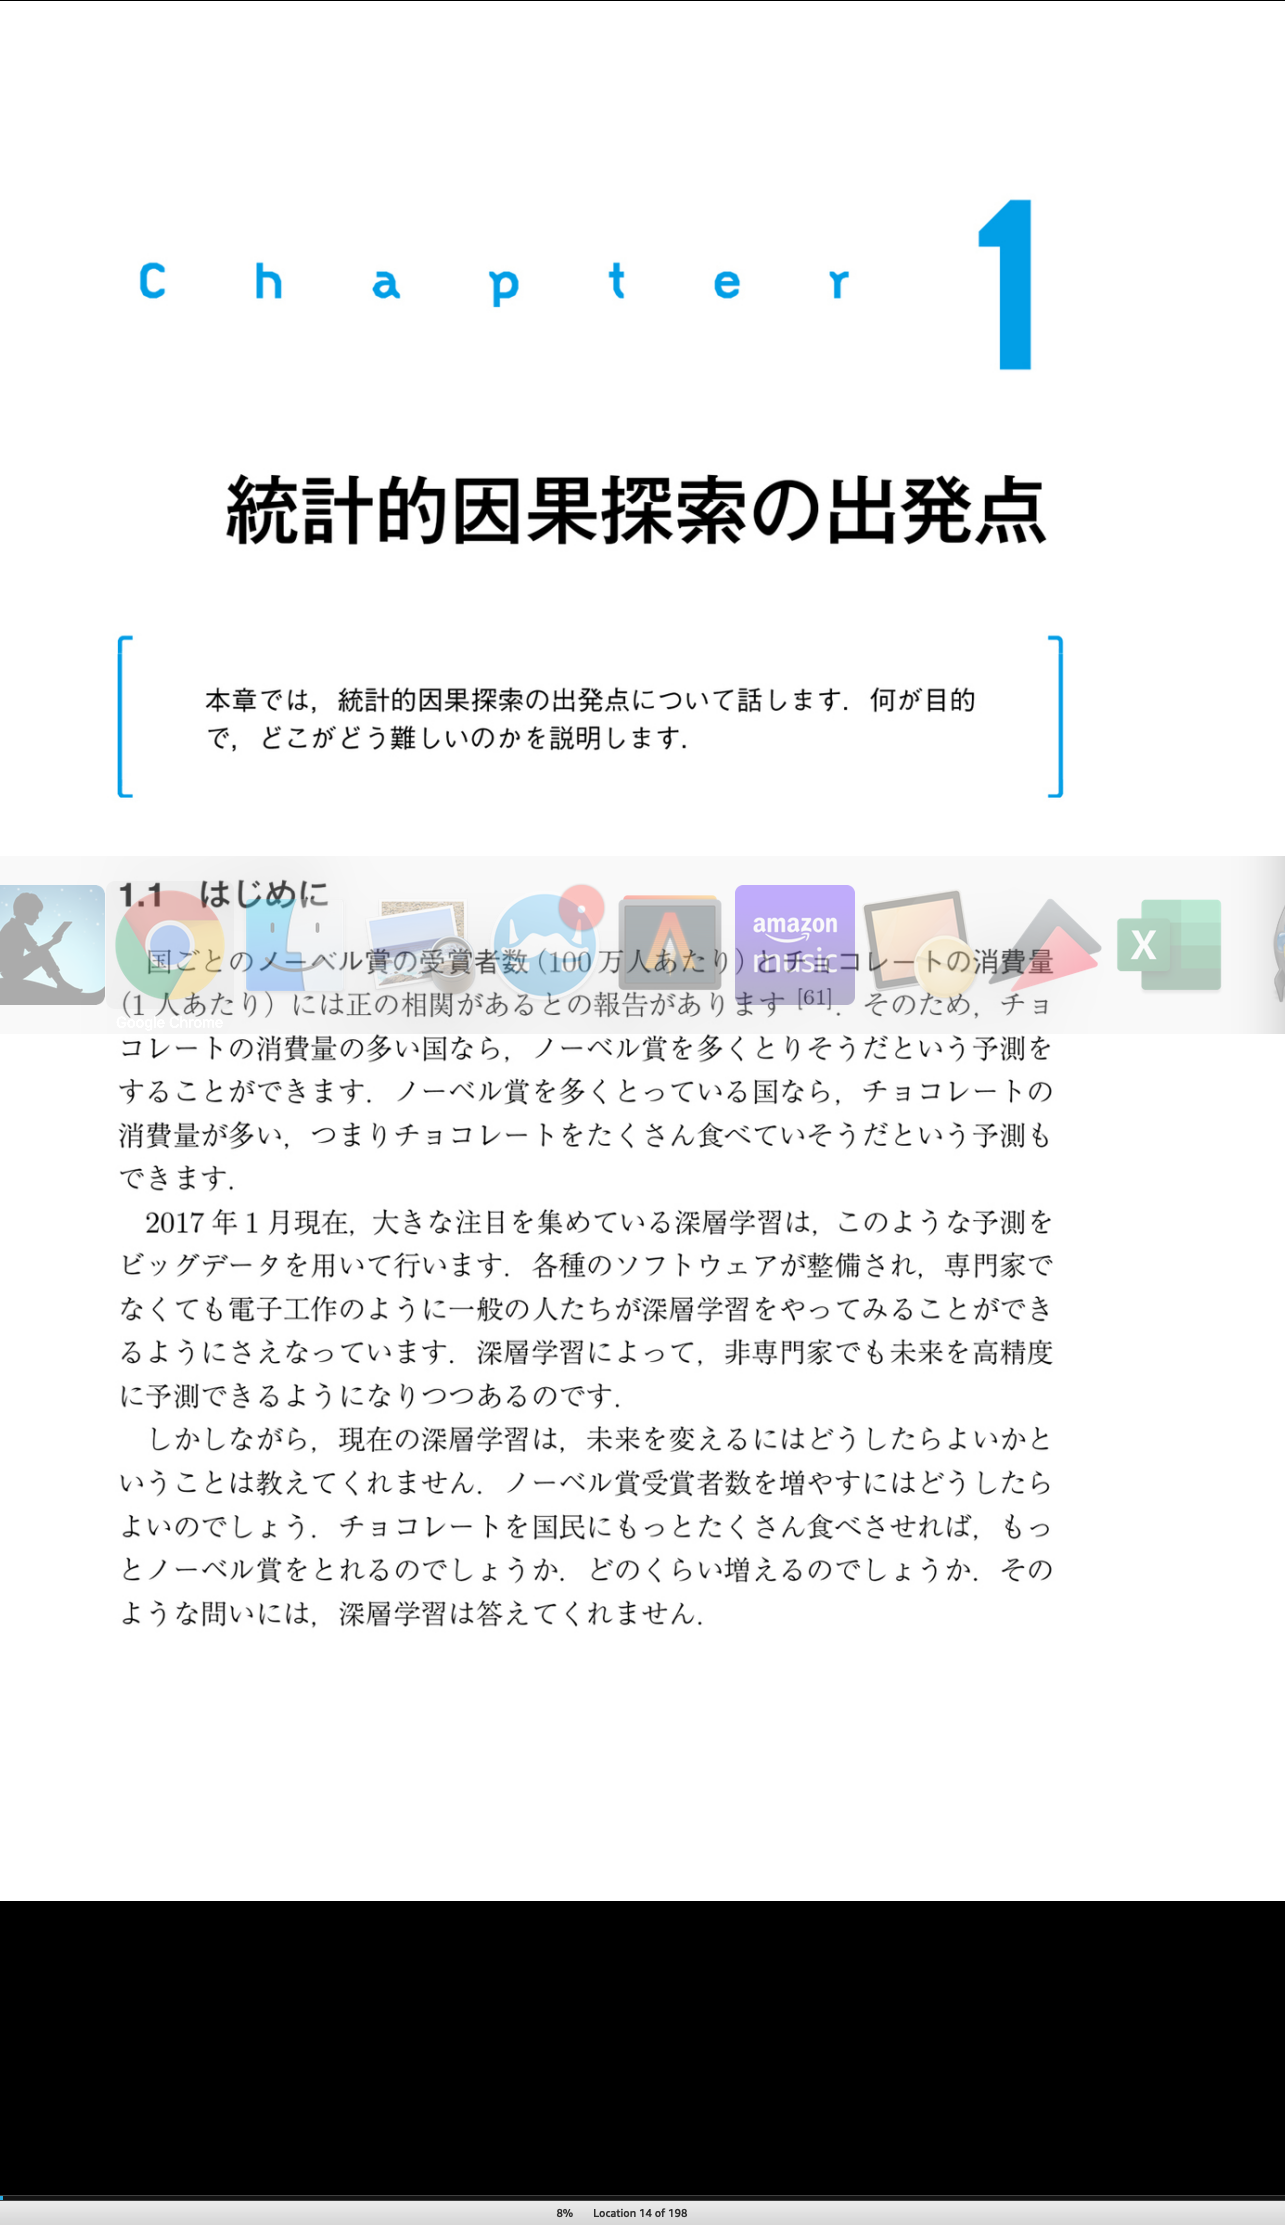

In [185]:
time.sleep(10)
pyautogui.screenshot(name, region=(50,335, 1335-50, 2235))

In [128]:
!ls stock

test.png  test40.png


In [169]:
pages = 200

In [ ]:
time.sleep(30)
for i in range(pages):
    name = 'toukei{}.png'.format(i+1)
    pyautogui.screenshot(name, region=(50,335, 1335-50, 2235-335))
    time.sleep(1)
    pyautogui.typewrite('left')
    time.sleep(1)

In [208]:
a = glob("./stock/*")

In [211]:
a.sort()

In [217]:
len(a)

198

In [276]:
imagelist = glob('./stock/*.png')

In [278]:
!pip install fpdf

  Stored in directory: /Users/iida/Library/Caches/pip/wheels/9a/e9/77/4554ff5c99bc3f487c8d69620d8c41d99d54e9c54ab20ef4c9
Successfully built fpdf


In [281]:
from fpdf import FPDF
pdf = FPDF()
# imagelist is the list with all image filenames
i = 1
for image in imagelist:
    i += 1
    print(i)
    pdf.add_page()
    pdf.image(image)
pdf.output("yourfile.pdf", "F")

2
3


KeyboardInterrupt: 

In [180]:
time.sleep(10)
interact(cropImage, heightRange = makeRangeSlider(height), widthRange = makeRangeSlider(width))

interactive(children=(IntRangeSlider(value=(0, 2559), description='xlim:', max=2559, readout_format='.1d'), In…

<function __main__.cropImage(heightRange, widthRange)>